The data I have here is from the CSSEGISandData/COVID-19 repository on github. It's provided by Johns Hopkins University Center for Systems Science and Engineering. They are really great for putting this data set together.

In [72]:
from matplotlib import pyplot as plt
plt.ion()
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [73]:
raw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

From a data cleaning perspective, I filtered down to the country I care about. Removed columns I didn't need and transpose to make it easier. An annoying side effect is that the first column name is the row number of the record I pulled so I renamed it.

After that I iterated the rows to calculate a new field which was the current value subtracting the previous value. This gave me the new cases each day.

I then went ahead and plotted the result immediately.

In [74]:
def get_cleaned(country):
    df = raw[raw['Country/Region'] == country]
    df = df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).T

    mapping = {}
    mapping[list(df.columns)[0]] = "Total Cases"

    df = df.rename(columns=mapping)
    diff = []
    acc = 0
    for index, row in df.iterrows():
        curr = row.iloc[0]
        diff.append(curr - acc)
        acc = curr
    df["New Cases"] = diff
    df.plot(figsize=(10,10), title='Cases in ' + country)
    return df

The two main stats I'm working with are Total Cases on a day to day basis, as well is the New Cases on each day.
I've picked out the three countries with the most covid cases.

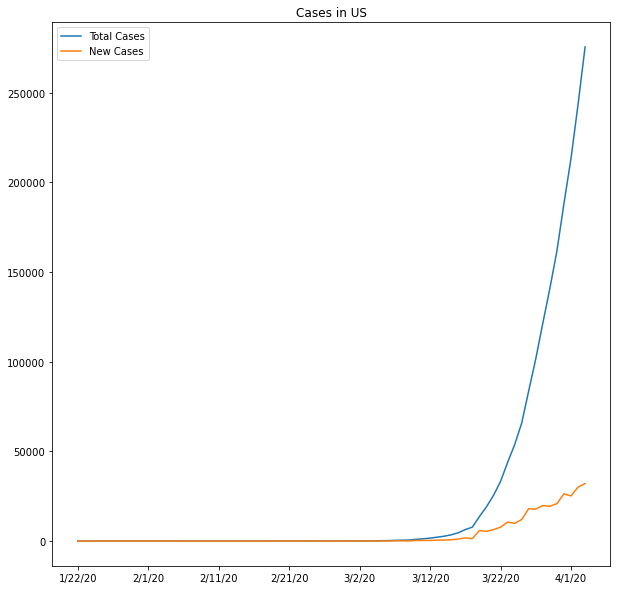

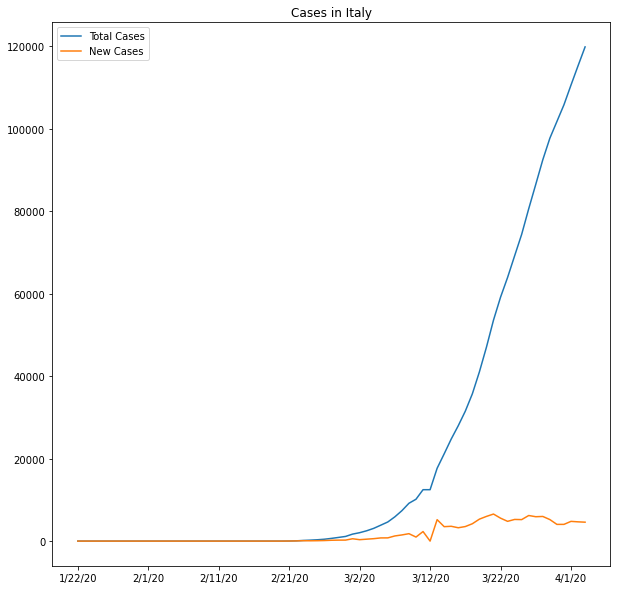

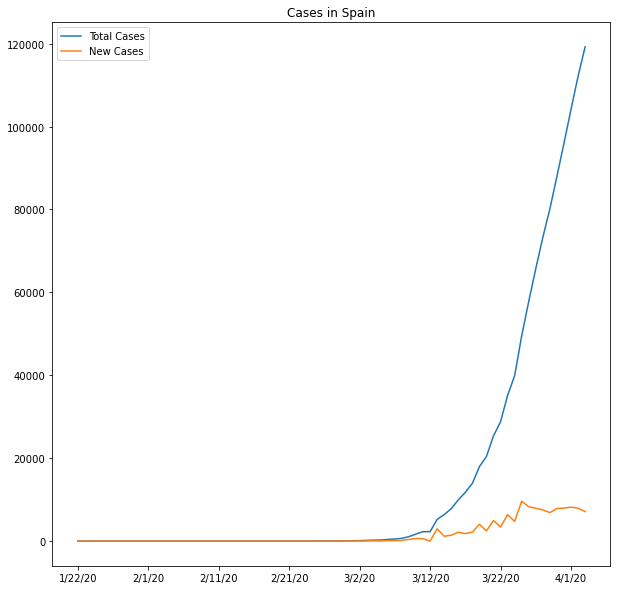

In [75]:
us = get_cleaned('US')
italy = get_cleaned('Italy')
spain = get_cleaned('Spain')

In [76]:
us_population = 327.2
italy_population = 60.48
spain_population = 46.66

italy_scale = italy_population / us_population
spain_scale = spain_population / us_population

Taking the number of cases, scaling for relative population gives very interesting results. I've scaled up the cases for Italy and Spain as if they had the population of the US. 

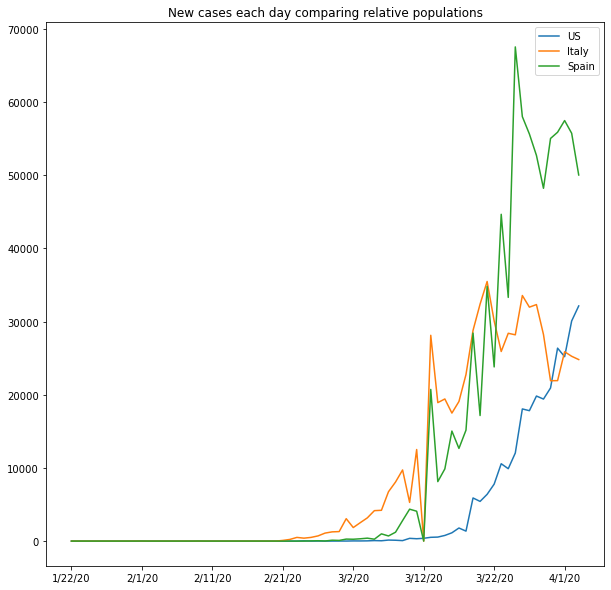

In [77]:
ndf = pd.DataFrame(data={
    "US": us['New Cases'], 
    'Italy': italy['New Cases'] / italy_scale,
    'Spain': spain['New Cases'] / spain_scale
})
ndf.plot(figsize=(10,10), title="New cases each day comparing relative populations")